<a href="https://colab.research.google.com/github/rreghunandan/Project--E-Commerce-Customer-Segmentation/blob/main/Project_3_E_commerce_Customer_Segementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project On E -Commerce Customer Segmentation

The dataset contains details regarding the Invoice number,Stock code,description,Qunatity,Invoice date,Unit Price,CustomerID & Country

# Importing Libraries

In [124]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings

# Load and read the dataset

In [125]:
df=pd.read_csv("/content/data.csv",encoding="ISO-8859-1")
df.shape

(541909, 8)

In [126]:
df.head()         # displays five rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [127]:
df.dtypes                                                                     # data type

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [128]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
#df['InvoiceNo']=df['InvoiceNo'].astype(int)
#df["CustomerID"]=df["CustomerID"].astype(int)
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [129]:
df.isnull().sum()                                                    # check for null values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

With the enormous data available, it is impossible to impute values for the customerID. So deleting the missing values in customerID from the dataframe.

In [130]:
df.dropna(axis = 0, subset = ['CustomerID'], inplace = True)                              #dropping the missing values/rows from the CustomerID
df.shape

(406829, 8)

In [131]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#Checking for duplicate entries and deleting them .

In [132]:
df['Country'].duplicated().value_counts()

True     406792
False        37
Name: Country, dtype: int64

In [133]:
df['InvoiceNo'].duplicated().value_counts()

True     384639
False     22190
Name: InvoiceNo, dtype: int64

In [134]:
df.duplicated().sum()


5225

In [135]:
df.drop_duplicates(inplace = True)
df.shape

(401604, 8)

# Doing NLP in the description colum
-removing spaces & number
-converting to small letters

In [136]:
df["Description"]

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 401604, dtype: object

In [137]:
df["Desc_new"]=df["Description"].str.replace("[^a-zA-Z]","  ")
df["Desc_new"]=df["Desc_new"].astype(str)
df["Desc_new"]

0          WHITE  HANGING  HEART  T  LIGHT  HOLDER
1                            WHITE  METAL  LANTERN
2               CREAM  CUPID  HEARTS  COAT  HANGER
3         KNITTED  UNION  FLAG  HOT  WATER  BOTTLE
4              RED  WOOLLY  HOTTIE  WHITE  HEART  
                            ...                   
541904           PACK  OF        SPACEBOY  NAPKINS
541905           CHILDREN  S  APRON  DOLLY  GIRL  
541906           CHILDRENS  CUTLERY  DOLLY  GIRL  
541907          CHILDRENS  CUTLERY  CIRCUS  PARADE
541908         BAKING  SET      PIECE  RETROSPOT  
Name: Desc_new, Length: 401604, dtype: object

In [138]:
df["Desc_new"]=df["Desc_new"].apply(lambda row:" ".join([word for word in row.split() if len(word)>2]))
df["Desc_new"]

0            WHITE HANGING HEART LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4               RED WOOLLY HOTTIE WHITE HEART
                         ...                 
541904                  PACK SPACEBOY NAPKINS
541905              CHILDREN APRON DOLLY GIRL
541906           CHILDRENS CUTLERY DOLLY GIRL
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908             BAKING SET PIECE RETROSPOT
Name: Desc_new, Length: 401604, dtype: object

In [139]:
df["Desc_new"]=[review.lower() for review in df["Desc_new"]]
df["Desc_new"]
                

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
541904                  pack spaceboy napkins
541905              children apron dolly girl
541906           childrens cutlery dolly girl
541907        childrens cutlery circus parade
541908             baking set piece retrospot
Name: Desc_new, Length: 401604, dtype: object

#Removing Stop words ,lemmatising

In [140]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stopwrds =stopwords.words('english')

#Making cutom list of stop words to be removed
addwrds=[]

#Adding to thelist of words
stopwrds.extend(addwrds)

#Function to remove stop words
def remove_stopwrds(rev):
  review_tokenized=word_tokenize(rev)
  rev_new=" ".join([i for i in review_tokenized if i not in stopwrds])
  return rev_new


#Removing Stop words
df['Desc_new']=[remove_stopwrds(r) for r in df['Desc_new']]




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [141]:
#Begin Lemmatisation
nltk.download("wordnet")
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

#function to convert nltk tag to wordnet tag
lemmatizer=WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startwith('J'):
    return wordnet.ADJ
  elif nltk_tag.startwith('V'):
    return wordnet.VERB
  elif nltk_tag.startwith('N'):
    return wordnet.NOUN
  elif nltk_tag.startwith('R'):
    return wordnet.ADJ
  else:
    return None


def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_-word_tokenize(sentence))
  wordnet_tagged=map(lambda x:(x[0],nltk_tag_to_wordnet_tag(x[1])),nltk_tagged)

  lemmatized_sentence = []
  for word,tag in wordnet_tagged:
    if tag is None:
      lemmatized_sentence.append(word)
    else:
     lemmatized_sentence.append(lemmatizer.lemmatize(word,tag))
  return " ".join(lemmatized_sentence)


  df["Desc_new"]=df['Desc_new'].apply(lambda x:lemmatize_sentence(x))



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [142]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Desc_new
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,white hanging heart light holder
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,white metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,knitted union flag hot water bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,red woolly hottie white heart
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,pack spaceboy napkins
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,children apron dolly girl
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,childrens cutlery dolly girl
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,childrens cutlery circus parade


In [143]:
#Removing duplicated descriptions
df2=df["Desc_new"].drop_duplicates()
df2=pd.DataFrame(df2)
df2

,Desc_new
0,white hanging heart light holder
1,white metal lantern
2,cream cupid hearts coat hanger
3,knitted union flag hot water bottle
4,red woolly hottie white heart
...,...
503602,set ribbons perfectly pretty
504104,set ribbons party
530382,pink crystal skull phone charm
537621,cream hanging heart light holder


In [144]:
#Import the libraries we need
from sklearn.feature_extraction.text import CountVectorizer # give you the bag of words model
import pandas as pd

# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer(binary = False) 

# Step 3. Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(df2["Desc_new"]) # fit - design the vocbulary and transform will convert the text into numbers based on the presence of the word

# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names()
df3=pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

In [145]:
#shows the words in description colum
df3

,abc,abstract,acapulco,account,acrylic,address,ade,adult,advent,afghan,...,woven,wrap,wrapping,wreath,wrecking,writing,xmas,yellow,yuletide,zinc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
x=bag_of_words.toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#Using K-means clustering for finding the product codes

In [147]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("fivethirtyeight")

from warnings import filterwarnings
filterwarnings("ignore")

To find the optimal value of K we are use Elbow plot ,where k is the hyperparameter.


In [148]:
list_k=list(range(1,25))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(x)
    inertias.append(km.inertia_)

Text(0, 0.5, 'Sum of squared error')

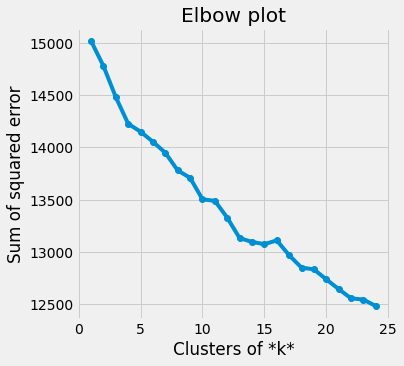

In [149]:
# Make elbow plot
plt.figure(figsize = (5, 5))
plt.title('Elbow plot')
plt.plot(list_k,inertias,'-o')
plt.xlabel('Clusters of *k*')
plt.ylabel('Sum of squared error')


Since there is no optimal value that can be infered here we will do PCA.

In [150]:
sc=StandardScaler()                                                                 #performing standarisation  
X_scaled= sc.fit_transform(x)

In [151]:
from sklearn.decomposition import PCA
components= None
pca=PCA(n_components = 100)                                        #components is the number of reduced relevant columns (hyperparameter) 
pca.fit(X_scaled)                                                                        #PCA on scaled data

PCA(n_components=100)

In [152]:
#prints the explained variance
print("Variances(Percentage)")
print(pca.explained_variance_ratio_*100)


Variances(Percentage)
[0.18461039 0.18153452 0.18047742 0.17933406 0.17735792 0.17591903
 0.17488398 0.17327373 0.16771515 0.16643005 0.16500214 0.16452817
 0.16365748 0.16237777 0.16193127 0.16062867 0.15968719 0.15901754
 0.15775058 0.15722789 0.15679188 0.15598846 0.15510623 0.15457386
 0.15355101 0.15303838 0.15280238 0.15156285 0.1512554  0.15093836
 0.1505055  0.15005022 0.14950045 0.14899555 0.14869069 0.14806965
 0.14713155 0.14654607 0.14628135 0.14564491 0.14554519 0.14499896
 0.14453012 0.14330519 0.14276295 0.14180968 0.14122068 0.14101091
 0.14021554 0.14007872 0.13973456 0.13939715 0.13892599 0.13842689
 0.13828356 0.13755388 0.1373783  0.13705902 0.13591286 0.13560968
 0.13495046 0.13463289 0.13449357 0.13385822 0.13356996 0.13318948
 0.13235951 0.13187629 0.13146876 0.13124501 0.13103982 0.12999603
 0.12977443 0.12946345 0.12870683 0.12851514 0.12835302 0.12765844
 0.12742634 0.1269635  0.12648762 0.12617603 0.12600698 0.12560869
 0.12518491 0.12462917 0.12444694 0.1236

In [153]:

print ("cumulative variance (Percentage)")
print((pca.explained_variance_ratio_.cumsum() * 100)[:100])



cumulative variance (Percentage)
[ 0.18461039  0.3661449   0.54662232  0.72595639  0.9033143   1.07923333
  1.2541173   1.42739103  1.59510618  1.76153623  1.92653837  2.09106654
  2.25472402  2.41710178  2.57903306  2.73966173  2.89934891  3.05836645
  3.21611704  3.37334493  3.53013681  3.68612527  3.84123149  3.99580535
  4.14935636  4.30239474  4.45519712  4.60675997  4.75801537  4.90895373
  5.05945923  5.20950945  5.3590099   5.50800545  5.65669614  5.8047658
  5.95189735  6.09844341  6.24472477  6.39036968  6.53591487  6.68091383
  6.82544395  6.96874914  7.11151209  7.25332177  7.39454245  7.53555336
  7.6757689   7.81584763  7.95558219  8.09497933  8.23390533  8.37233221
  8.51061577  8.64816966  8.78554796  8.92260697  9.05851984  9.19412952
  9.32907998  9.46371287  9.59820644  9.73206466  9.86563462  9.9988241
 10.13118361 10.2630599  10.39452866 10.52577367 10.65681348 10.78680951
 10.91658394 11.04604739 11.17475421 11.30326935 11.43162238 11.55928082
 11.68670715 11.8136

Here what culumaltive varince says is at 0.18461039 the data lost is 99% and the retained data is only is.1849% which is not feasible

Text(0, 0.5, 'Explained variance(%)')

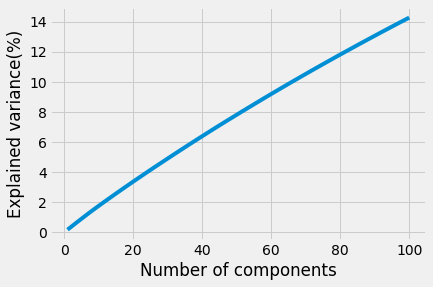

In [154]:
#plot the cumulative varience
components=len(pca.explained_variance_ratio_)\
  if components  is None else components
plt.plot(range(1,components+1),
         np.cumsum(pca.explained_variance_ratio_*100))

plt.xlabel("Number of components")
plt.ylabel("Explained variance(%)")
         

In [155]:
from sklearn.decomposition import PCA

pca=PCA(1000)
Principal_Component_Analysis=pca.fit_transform(x)
Principal_Component_Analysis.shape

(3763, 1000)

In [156]:
#Elbow plot
#We make a plot btwn K value and inertia

list_k=list(range(1,20))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(x)
    inertias.append(km.inertia_)

Text(0, 0.5, 'Sum of squared error')

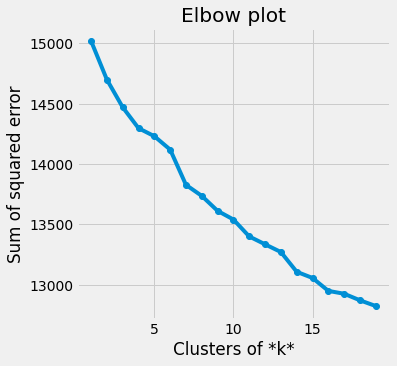

In [157]:
# Make elbow plot
plt.figure(figsize = (5, 5))
plt.title('Elbow plot')
plt.plot(list_k,inertias,'-o')
plt.xlabel('Clusters of *k*')
plt.ylabel('Sum of squared error')

In [158]:
#km modelling
km=KMeans(n_clusters=8)         #applying k
km.fit(Principal_Component_Analysis )   #fit the data

centroids = km.cluster_centers_

Here we are dividing the set of products into 8groups


In [159]:
#shows which group each datapoint belongs to
km.labels_

array([2, 1, 6, ..., 0, 2, 1], dtype=int32)

In [160]:
#Predicts the labels of cluster
label=km.fit_predict(Principal_Component_Analysis)
print(label)

[0 4 4 ... 3 0 4]


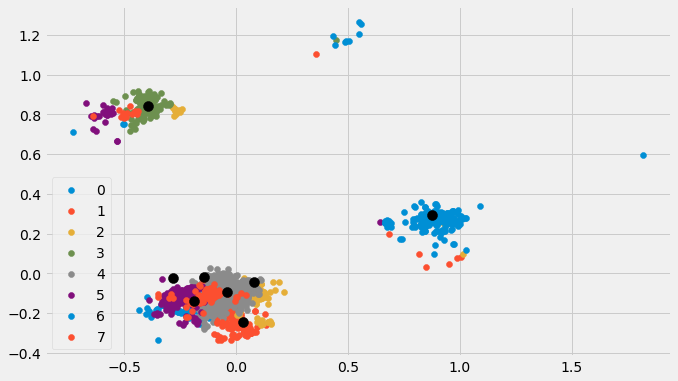

In [161]:
#Getting the centroids 
centroids=km.cluster_centers_
labels=np.unique(label)

#plotting

plt.figure(figsize=(10,6))
for i in labels:
  plt.scatter(Principal_Component_Analysis[label == i,0],Principal_Component_Analysis[label == i,1],label =i)
plt.scatter(centroids[:,0],centroids[:,1],s=100,c="k")
plt.legend()
plt.show()

#Concatenating the label,description new into dataframe

In [162]:
df5=pd.DataFrame(km.labels_)
print(df5.shape)
df5

(3763, 1)


,0
0,0
1,4
2,4
3,4
4,5
...,...
3758,6
3759,6
3760,3
3761,0


In [163]:
df2=df2.reset_index(drop=True)
df2

,Desc_new
0,white hanging heart light holder
1,white metal lantern
2,cream cupid hearts coat hanger
3,knitted union flag hot water bottle
4,red woolly hottie white heart
...,...
3758,set ribbons perfectly pretty
3759,set ribbons party
3760,pink crystal skull phone charm
3761,cream hanging heart light holder


In [164]:
df6=df2.join(df5)
df6.rename(columns={0:'Product Code'},inplace=True)
df6.head(3)

,Desc_new,Product Code
0,white hanging heart light holder,0
1,white metal lantern,4
2,cream cupid hearts coat hanger,4


In [165]:
df8=pd.merge(df,df6,how="left",on="Desc_new")
df8

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Desc_new,Product Code
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,white hanging heart light holder,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,white metal lantern,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,knitted union flag hot water bottle,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,red woolly hottie white heart,5
...,...,...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,pack spaceboy napkins,4
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,children apron dolly girl,4
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,childrens cutlery dolly girl,4
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,childrens cutlery circus parade,4


In [166]:
pd.get_dummies(df8["Product Code"])      #product code 

,0,1,2,3,4,5,6,7
0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
401599,0,0,0,0,1,0,0,0
401600,0,0,0,0,1,0,0,0
401601,0,0,0,0,1,0,0,0
401602,0,0,0,0,1,0,0,0


In [167]:
#Here we are concatination each product code to its respetive customeIDs
df9=pd.concat([df8,pd.get_dummies(df8["Product Code"])],axis=1)
df9


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Desc_new,Product Code,0,1,2,3,4,5,6,7
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,white hanging heart light holder,0,1,0,0,0,0,0,0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,white metal lantern,4,0,0,0,0,1,0,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger,4,0,0,0,0,1,0,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,knitted union flag hot water bottle,4,0,0,0,0,1,0,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,red woolly hottie white heart,5,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,pack spaceboy napkins,4,0,0,0,0,1,0,0,0
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,children apron dolly girl,4,0,0,0,0,1,0,0,0
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,childrens cutlery dolly girl,4,0,0,0,0,1,0,0,0
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,childrens cutlery circus parade,4,0,0,0,0,1,0,0,0


#Grouping the dataframe on the basis of CustomerID

In [171]:
df9.groupby(["CustomerID"]).mean()

,Quantity,UnitPrice,Product Code,0,1,2,3,4,5,6,7
CustomerID,,,,,,,,,,,
12346.0,0.000000,1.040000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
12347.0,13.505495,2.644011,3.428571,0.038462,0.104396,0.115385,0.071429,0.549451,0.043956,0.076923,0.000000
12348.0,75.516129,5.764839,3.903226,0.000000,0.032258,0.064516,0.064516,0.741935,0.000000,0.096774,0.000000
12349.0,8.643836,8.289041,3.972603,0.027397,0.095890,0.082192,0.013699,0.479452,0.068493,0.219178,0.013699
12350.0,11.588235,3.841176,3.470588,0.000000,0.117647,0.058824,0.058824,0.764706,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
18280.0,4.500000,4.765000,3.700000,0.000000,0.100000,0.100000,0.000000,0.700000,0.000000,0.100000,0.000000
18281.0,7.714286,5.622857,4.571429,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000,0.285714,0.000000
18282.0,7.538462,4.821538,3.923077,0.000000,0.000000,0.076923,0.076923,0.769231,0.000000,0.076923,0.000000


In [ ]:
df10=df9.groupby(["CustomerID"]).mean()
df10

In [218]:
df10.reset_index()
df10

,Quantity,UnitPrice,Product Code,0,1,2,3,4,5,6,7
CustomerID,,,,,,,,,,,
12346.0,0.000000,1.040000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
12347.0,13.505495,2.644011,3.428571,0.038462,0.104396,0.115385,0.071429,0.549451,0.043956,0.076923,0.000000
12348.0,75.516129,5.764839,3.903226,0.000000,0.032258,0.064516,0.064516,0.741935,0.000000,0.096774,0.000000
12349.0,8.643836,8.289041,3.972603,0.027397,0.095890,0.082192,0.013699,0.479452,0.068493,0.219178,0.013699
12350.0,11.588235,3.841176,3.470588,0.000000,0.117647,0.058824,0.058824,0.764706,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
18280.0,4.500000,4.765000,3.700000,0.000000,0.100000,0.100000,0.000000,0.700000,0.000000,0.100000,0.000000
18281.0,7.714286,5.622857,4.571429,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000,0.285714,0.000000
18282.0,7.538462,4.821538,3.923077,0.000000,0.000000,0.076923,0.076923,0.769231,0.000000,0.076923,0.000000


From the above dataframe we can see the average purchase made by various customerIDs for various products (0-7)

#Using clustering to find the cluster of customers